In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import warnings
import seaborn as sns

In [13]:
warnings.filterwarnings('ignore')

# Task -1 :  Import the "City_Air_Quality.csv" dataset. 

In [14]:
df = pd.read_csv("City_Air_Quality.csv",encoding="cp1252",low_memory=False)

# Task -2: Explore the dataset to understand its structure and content.

In [15]:
df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [16]:
df.tail()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
435737,SAMP,24-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,143.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-24
435738,SAMP,29-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,46.0,171.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-29
435739,NaN,NaN,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,NaN,NaN,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435741,NaN,NaN,Tripura,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In [18]:
df.describe()

,so2,no2,rspm,spm,pm2_5
count,401096.000000,419509.000000,395520.000000,198355.000000,9314.000000
mean,10.829414,25.809623,108.832784,220.783480,40.791467
std,11.177187,18.503086,74.872430,151.395457,30.832525
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,5.000000,14.000000,56.000000,111.000000,24.000000
50%,8.000000,22.000000,90.000000,187.000000,32.000000
75%,13.700000,32.200000,142.000000,296.000000,46.000000
max,909.000000,876.000000,6307.033333,3380.000000,504.000000


In [19]:
df.shape

(435742, 13)

In [20]:
print(df.columns)

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')


# Task 3: Identify the relevant variables for visualizing AQI trends, such as date, pollutant levels, and AQI values.

In [21]:
# defining columns of importance, which shall be used reguarly
VALUE_COLS = ['so2', 'no2', 'rspm', 'spm', 'pm2_5']

In [22]:
# invoking SimpleImputer to fill missing values
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
df[VALUE_COLS] = imputer.fit_transform(df[VALUE_COLS])

In [23]:
# checking to see if the dataset has any null values left over and the format
print(df.isnull().sum())

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                                 0
no2                                 0
rspm                                0
spm                                 0
location_monitoring_station     27491
pm2_5                               0
date                                7
dtype: int64


In [24]:
df.fillna({
    'agency': 'Unknown',
    'location': 'Unknown',
    'type': df['type'].mode()[0]  # filling with mode
}, inplace=True)


In [25]:
df.isnull().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            0
agency                              0
type                                0
so2                                 0
no2                                 0
rspm                                0
spm                                 0
location_monitoring_station     27491
pm2_5                               0
date                                7
dtype: int64

In [26]:
df.dropna(inplace=True)

In [27]:
# Drop rows with any NaN values in place
df.isnull().sum()

stn_code                       0
sampling_date                  0
state                          0
location                       0
agency                         0
type                           0
so2                            0
no2                            0
rspm                           0
spm                            0
location_monitoring_station    0
pm2_5                          0
date                           0
dtype: int64

# Task- 4: Create line plots or time series plots to visualize the overall AQI trend over time.

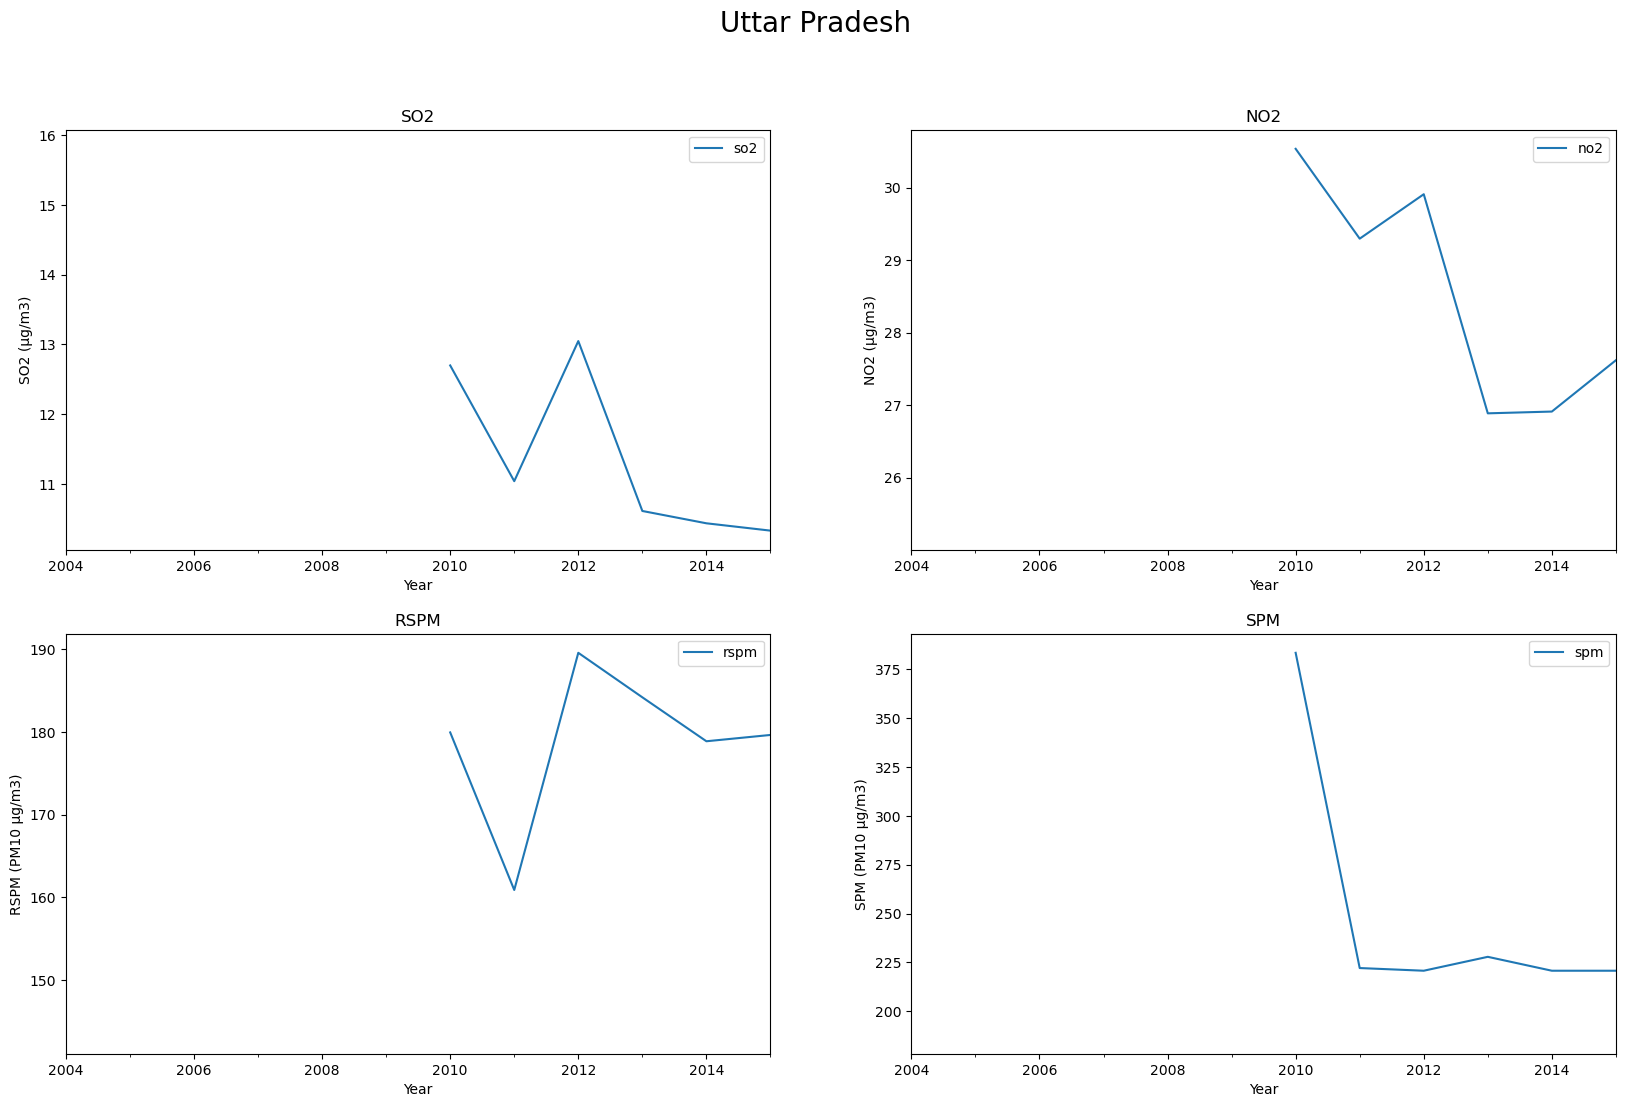

In [49]:
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Define a function to plot AQI trends for a state
def plot_for_state(state):
    fig, ax = plt.subplots(2, 2, figsize=(20, 12))
    fig.suptitle(state, size=20)
    
    # Filter data for the specified state
    state_df = df[df.state == state]

    # Ensure 'date' is set as index for time series analysis
    state_df = state_df.set_index('date')

    # Resampling to get yearly average values
    state_df = state_df[VALUE_COLS].resample('Y').mean()

    # Plot each pollutant
    state_df.so2.plot(legend=True, ax=ax[0][0], title="SO2")
    ax[0][0].set_ylabel("SO2 (μg/m3)")
    ax[0][0].set_xlabel("Year")

    state_df.no2.plot(legend=True, ax=ax[0][1], title="NO2")
    ax[0][1].set_ylabel("NO2 (μg/m3)")
    ax[0][1].set_xlabel("Year")

    state_df.rspm.plot(legend=True, ax=ax[1][0], title="RSPM")
    ax[1][0].set_ylabel("RSPM (PM10 μg/m3)")
    ax[1][0].set_xlabel("Year")

    state_df.spm.plot(legend=True, ax=ax[1][1], title="SPM")
    ax[1][1].set_ylabel("SPM (PM10 μg/m3)")
    ax[1][1].set_xlabel("Year")

    plt.show()

# Example: Plot AQI trends for Uttar Pradesh
plot_for_state("Uttar Pradesh")


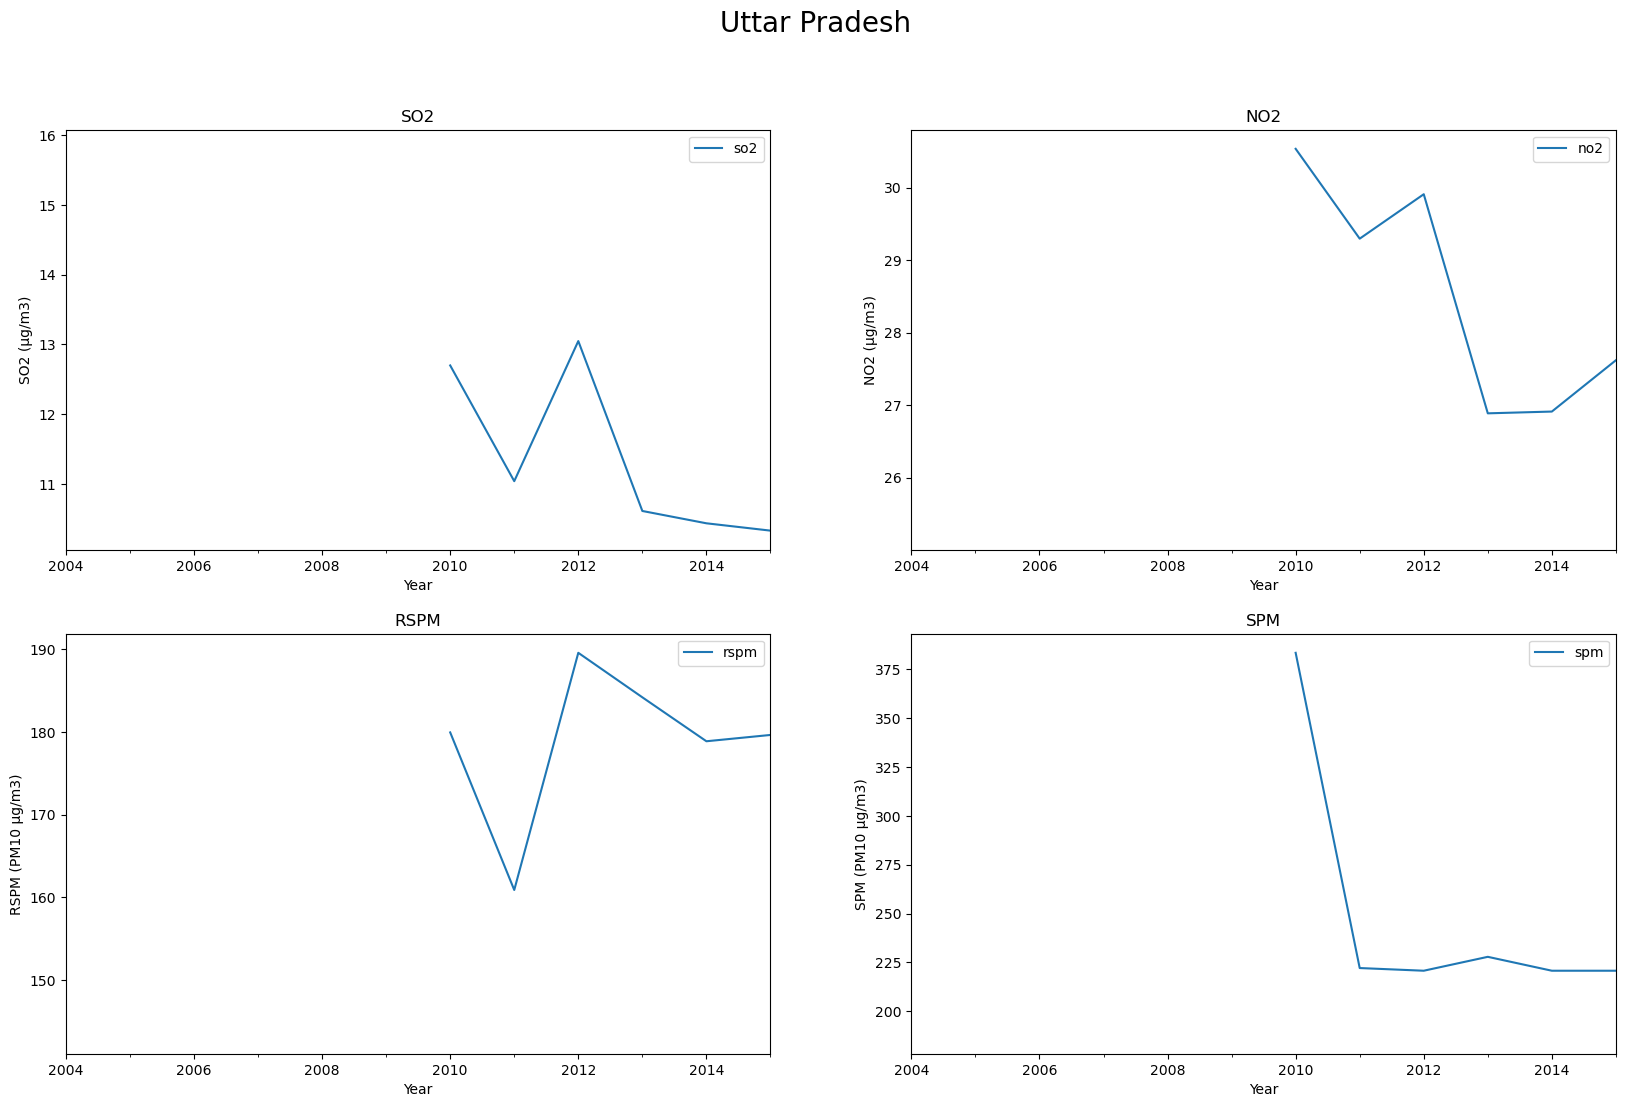

In [50]:
plot_for_state("Uttar Pradesh")

# Task - 6: Use bar plots or stacked bar plots to compare the AQI values across different dates or time periods.

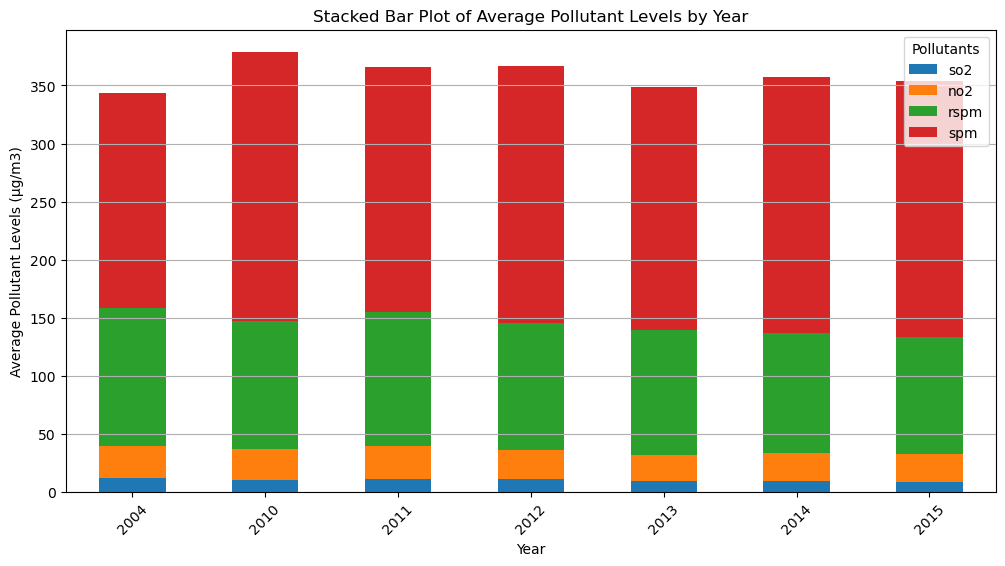

In [57]:
# Grouping by year and calculating mean pollutant levels
pollutants = df.groupby(df['date'].dt.year)[['so2', 'no2', 'rspm', 'spm']].mean()

# Plotting a stacked bar plot
pollutants.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Stacked Bar Plot of Average Pollutant Levels by Year')
plt.xlabel('Year')
plt.ylabel('Average Pollutant Levels (μg/m3)')
plt.xticks(rotation=45)
plt.legend(title='Pollutants')
plt.grid(axis='y')
plt.show()

# Task - 7: Create box plots or violin plots to analyze the distribution of AQI values for different pollutant categories. 

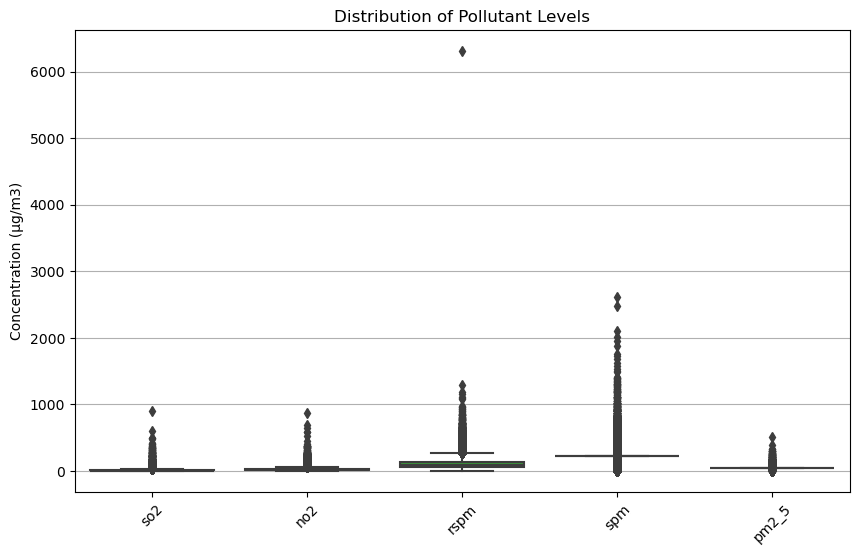

In [58]:
# Box plot for pollutant distributions
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[VALUE_COLS])
plt.title('Distribution of Pollutant Levels')
plt.ylabel('Concentration (μg/m3)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Task- 8: Use scatter plots or bubble charts to explore the relationship between AQI values and pollutant levels.

In [63]:
# Scatter plot for AQI vs SO2 levels
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['so2'], y=df['AQI'], alpha=0.5)
plt.title('Relationship Between SO2 and AQI')
plt.xlabel('SO2 (μg/m3)')
plt.ylabel('AQI')
plt.grid(True)
plt.show()

KeyError: 'AQI'

<Figure size 1000x600 with 0 Axes>

# Task - 9: Customize the visualizations by adding labels, titles, legends, and appropriate color schemes

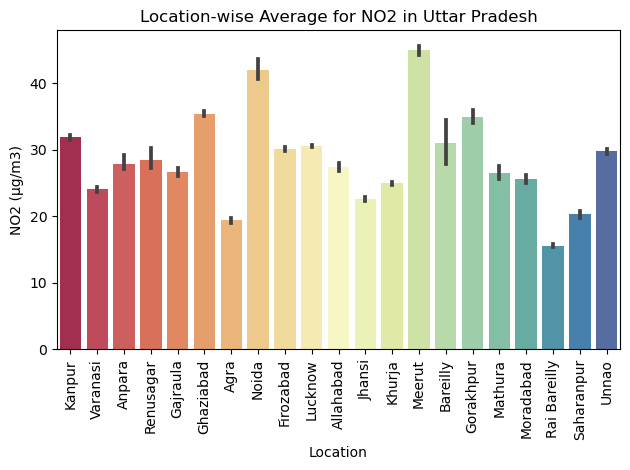

In [61]:
# Example customization for a bar plot
sns.barplot(x='location', y='no2', data=df[df['state'] == 'Uttar Pradesh'], palette='Spectral')
plt.title("Location-wise Average for NO2 in Uttar Pradesh")
plt.xlabel('Location')
plt.ylabel('NO2 (μg/m3)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [38]:
# Defining a function to plot pollutant averages for a given indicator (defaults to SO2)def location_avgs(state, indicator="so2"):
# Calculate average pollutant levels by state and location
def location_avgs(state, indicator):

    locs = df[VALUE_COLS + ['state', 'location', 'date']].groupby(['state', 'location']).mean()



    # Get averages for the specified state
    state_avgs = locs.loc[state].reset_index()



    # Create a bar plot with color
    sns.barplot(x='location', y=indicator, data=state_avgs, palette='Spectral')  # Added color palette



    plt.title("Location-wise Average for {} in {}".format(indicator, state))



    plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
    plt.ylabel(f'Average {indicator} (μg/m³)')  # Custom y-axis label
    plt.xlabel('Location')  # Custom x-axis label
    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()




# Call the function with the desired state and indicator
location_avgs("Uttar Pradesh", "no2")


TypeError: agg function failed [how->mean,dtype->object]

In [39]:
print(df.columns)


Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')
